# Spotify Classification Problem
## CS986: Fundamentals of Machine Learning for Data Analytics 

***Abhishek Biswas***<br>
***Zainab Alkandari***


# Introduction

The goal is to create a machine learning model that predicts a song's genre by analyzing various musical features like tempo, loudness, energy, and danceability. This classification task involves several important steps, starting with a deep dive into the data to understand its structure. The process includes handling missing values, identifying any outliers, and considering feature engineering to improve model accuracy. The primary metric for success will be classification accuracy. Ultimately, the aim is to develop a model that not only classifies songs effectively but also uncovers meaningful insights into how different musical attributes relate to their genres.

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import normalized_mutual_info_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Load and preprocess training dataset**

In [3]:
train_df = pd.read_csv('CS98XClassificationTrain.csv')

**Preview the training dataset**

In [5]:
train_df.head()

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1,My Happiness,Connie Francis,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,3,How Deep Is Your Love,Bee Gees,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,4,Woman in Love,Barbra Streisand,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,5,Goodbye Yellow Brick Road - Remastered 2014,Elton John,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


**Display basic information about the dataset** 

In [7]:
train_df.info()
train_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   year       453 non-null    int64 
 4   bpm        453 non-null    int64 
 5   nrgy       453 non-null    int64 
 6   dnce       453 non-null    int64 
 7   dB         453 non-null    int64 
 8   live       453 non-null    int64 
 9   val        453 non-null    int64 
 10  dur        453 non-null    int64 
 11  acous      453 non-null    int64 
 12  spch       453 non-null    int64 
 13  pop        453 non-null    int64 
 14  top genre  438 non-null    object
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


(453, 15)

**Count missing values in each column**

In [9]:
train_df.isna().any()

Id           False
title        False
artist       False
year         False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
top genre     True
dtype: bool

**The rows with missing 'top genre'**

In [11]:
train_df[train_df['top genre'].isna()]

,Id,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
1,2,Unchained Melody,The Teddy Bears,2011,114,44,53,-8,13,47,139,49,3,37,NaN
8,9,Someone Elses Roses,Joan Regan,2019,100,14,29,-10,15,32,143,89,3,34,NaN
26,27,Drinks On The House,Green Martini Keys,2016,97,16,57,-16,11,15,181,100,5,28,NaN
72,73,Pachuko Hop,Ike Carpenter Orchestra,2006,83,53,48,-9,34,80,135,59,3,28,NaN
90,91,Little Things Means A Lot,Jayne Mansfield,2008,109,29,70,-15,16,63,172,36,4,29,NaN
98,99,The Lady Is A Tramp,Mel Torme & the Mel-Tones,2016,138,60,41,-8,41,54,170,81,6,40,NaN
220,221,If I Give My Heart To You,The Teddy Bears,2011,113,29,49,-10,12,29,118,86,3,40,NaN
252,253,Happy Days And Lonely Nights,Suzi Miller And Johnson Brothers,2012,142,38,65,-8,13,69,146,43,3,27,NaN
265,266,Stairway Of Love,Terry Dene,2015,93,62,62,-7,25,86,120,55,4,27,NaN
266,267,You,Ten Sharp,1991,174,90,41,-8,19,67,273,43,3,61,NaN


**Data Partitioning**

In [19]:
# Drop rows with missing target labels
df = train_df.dropna(subset=['top genre'])

**Handle rare classes**

In [22]:
genre_counts = df['top genre'].value_counts()
df_filtered = df[df['top genre'].isin(genre_counts[genre_counts > 1].index)]

**Exploring categorical features using Normalized Mutual Information**

In [25]:
# Exploring categorical features using Normalized Mutual Information (NMI)
categorical_types = list(df_filtered.dtypes[df_filtered.dtypes == 'object'].index)
categorical_types.append('year')
for t in categorical_types:
    if t != 'top genre':
        print(f'{t}: {df_filtered[t].nunique()} unique values')
        print(f"Normalized Mutual Information Score: {normalized_mutual_info_score(df_filtered[t], df_filtered['top genre'])}\n")

title: 396 unique values
Normalized Mutual Information Score: 0.6694323670259759

artist: 291 unique values
Normalized Mutual Information Score: 0.7061685862122051

year: 64 unique values
Normalized Mutual Information Score: 0.44664640983914183



# Visualization

**Distribution of Numerical Features**

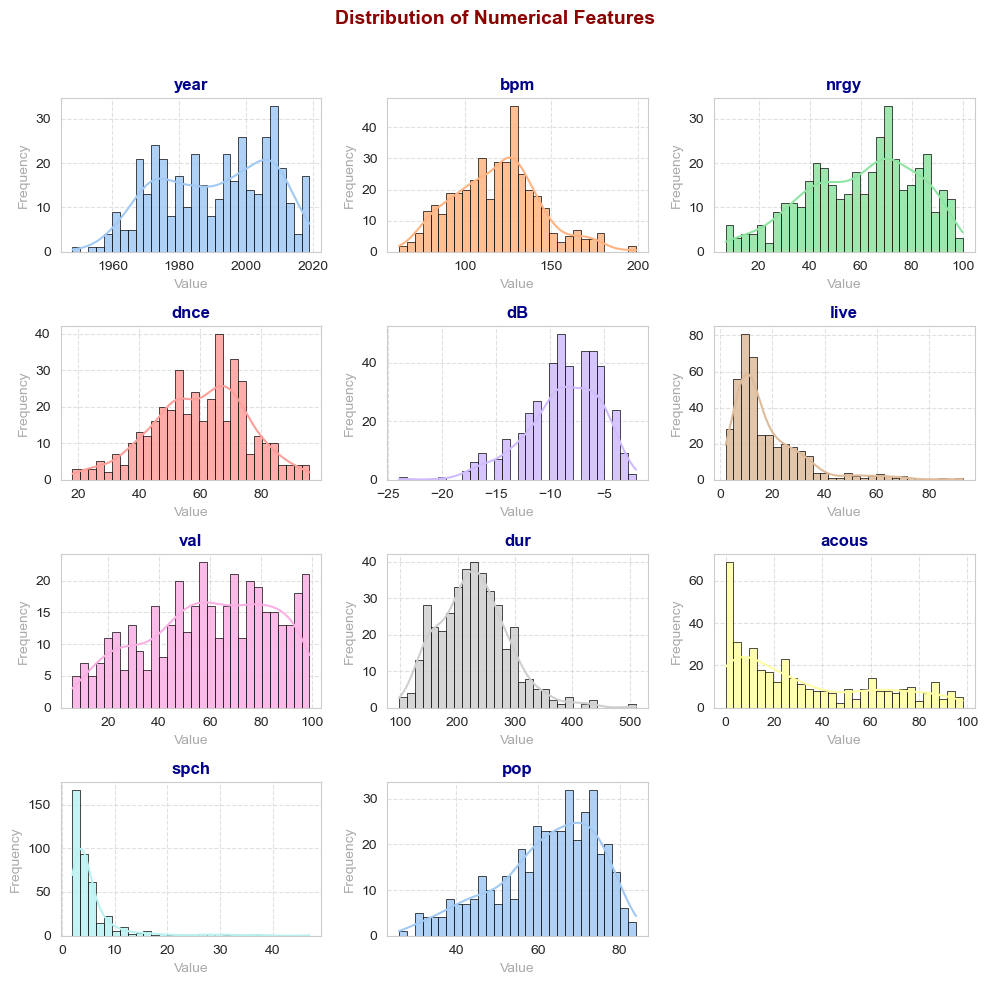

In [29]:
numeric_features = ['year', 'bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']
colors = sns.color_palette("pastel", len(numeric_features))
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=len(numeric_features) // 3 + 1, ncols=3, figsize=(10, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_features):
    sns.histplot(df_filtered[col], ax=axes[i], bins=30, kde=True, color=colors[i], edgecolor='black', alpha=0.85)
    axes[i].set_title(col, fontsize=12, fontweight='bold', color='darkblue')
    axes[i].set_xlabel('Value', fontsize=10, color='darkgray')
    axes[i].set_ylabel('Frequency', fontsize=10, color='darkgray')
    axes[i].grid(True, linestyle='--', alpha=0.6)

for i in range(len(numeric_features), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle("Distribution of Numerical Features", fontsize=14, fontweight='bold', color='darkred')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Pairplot**

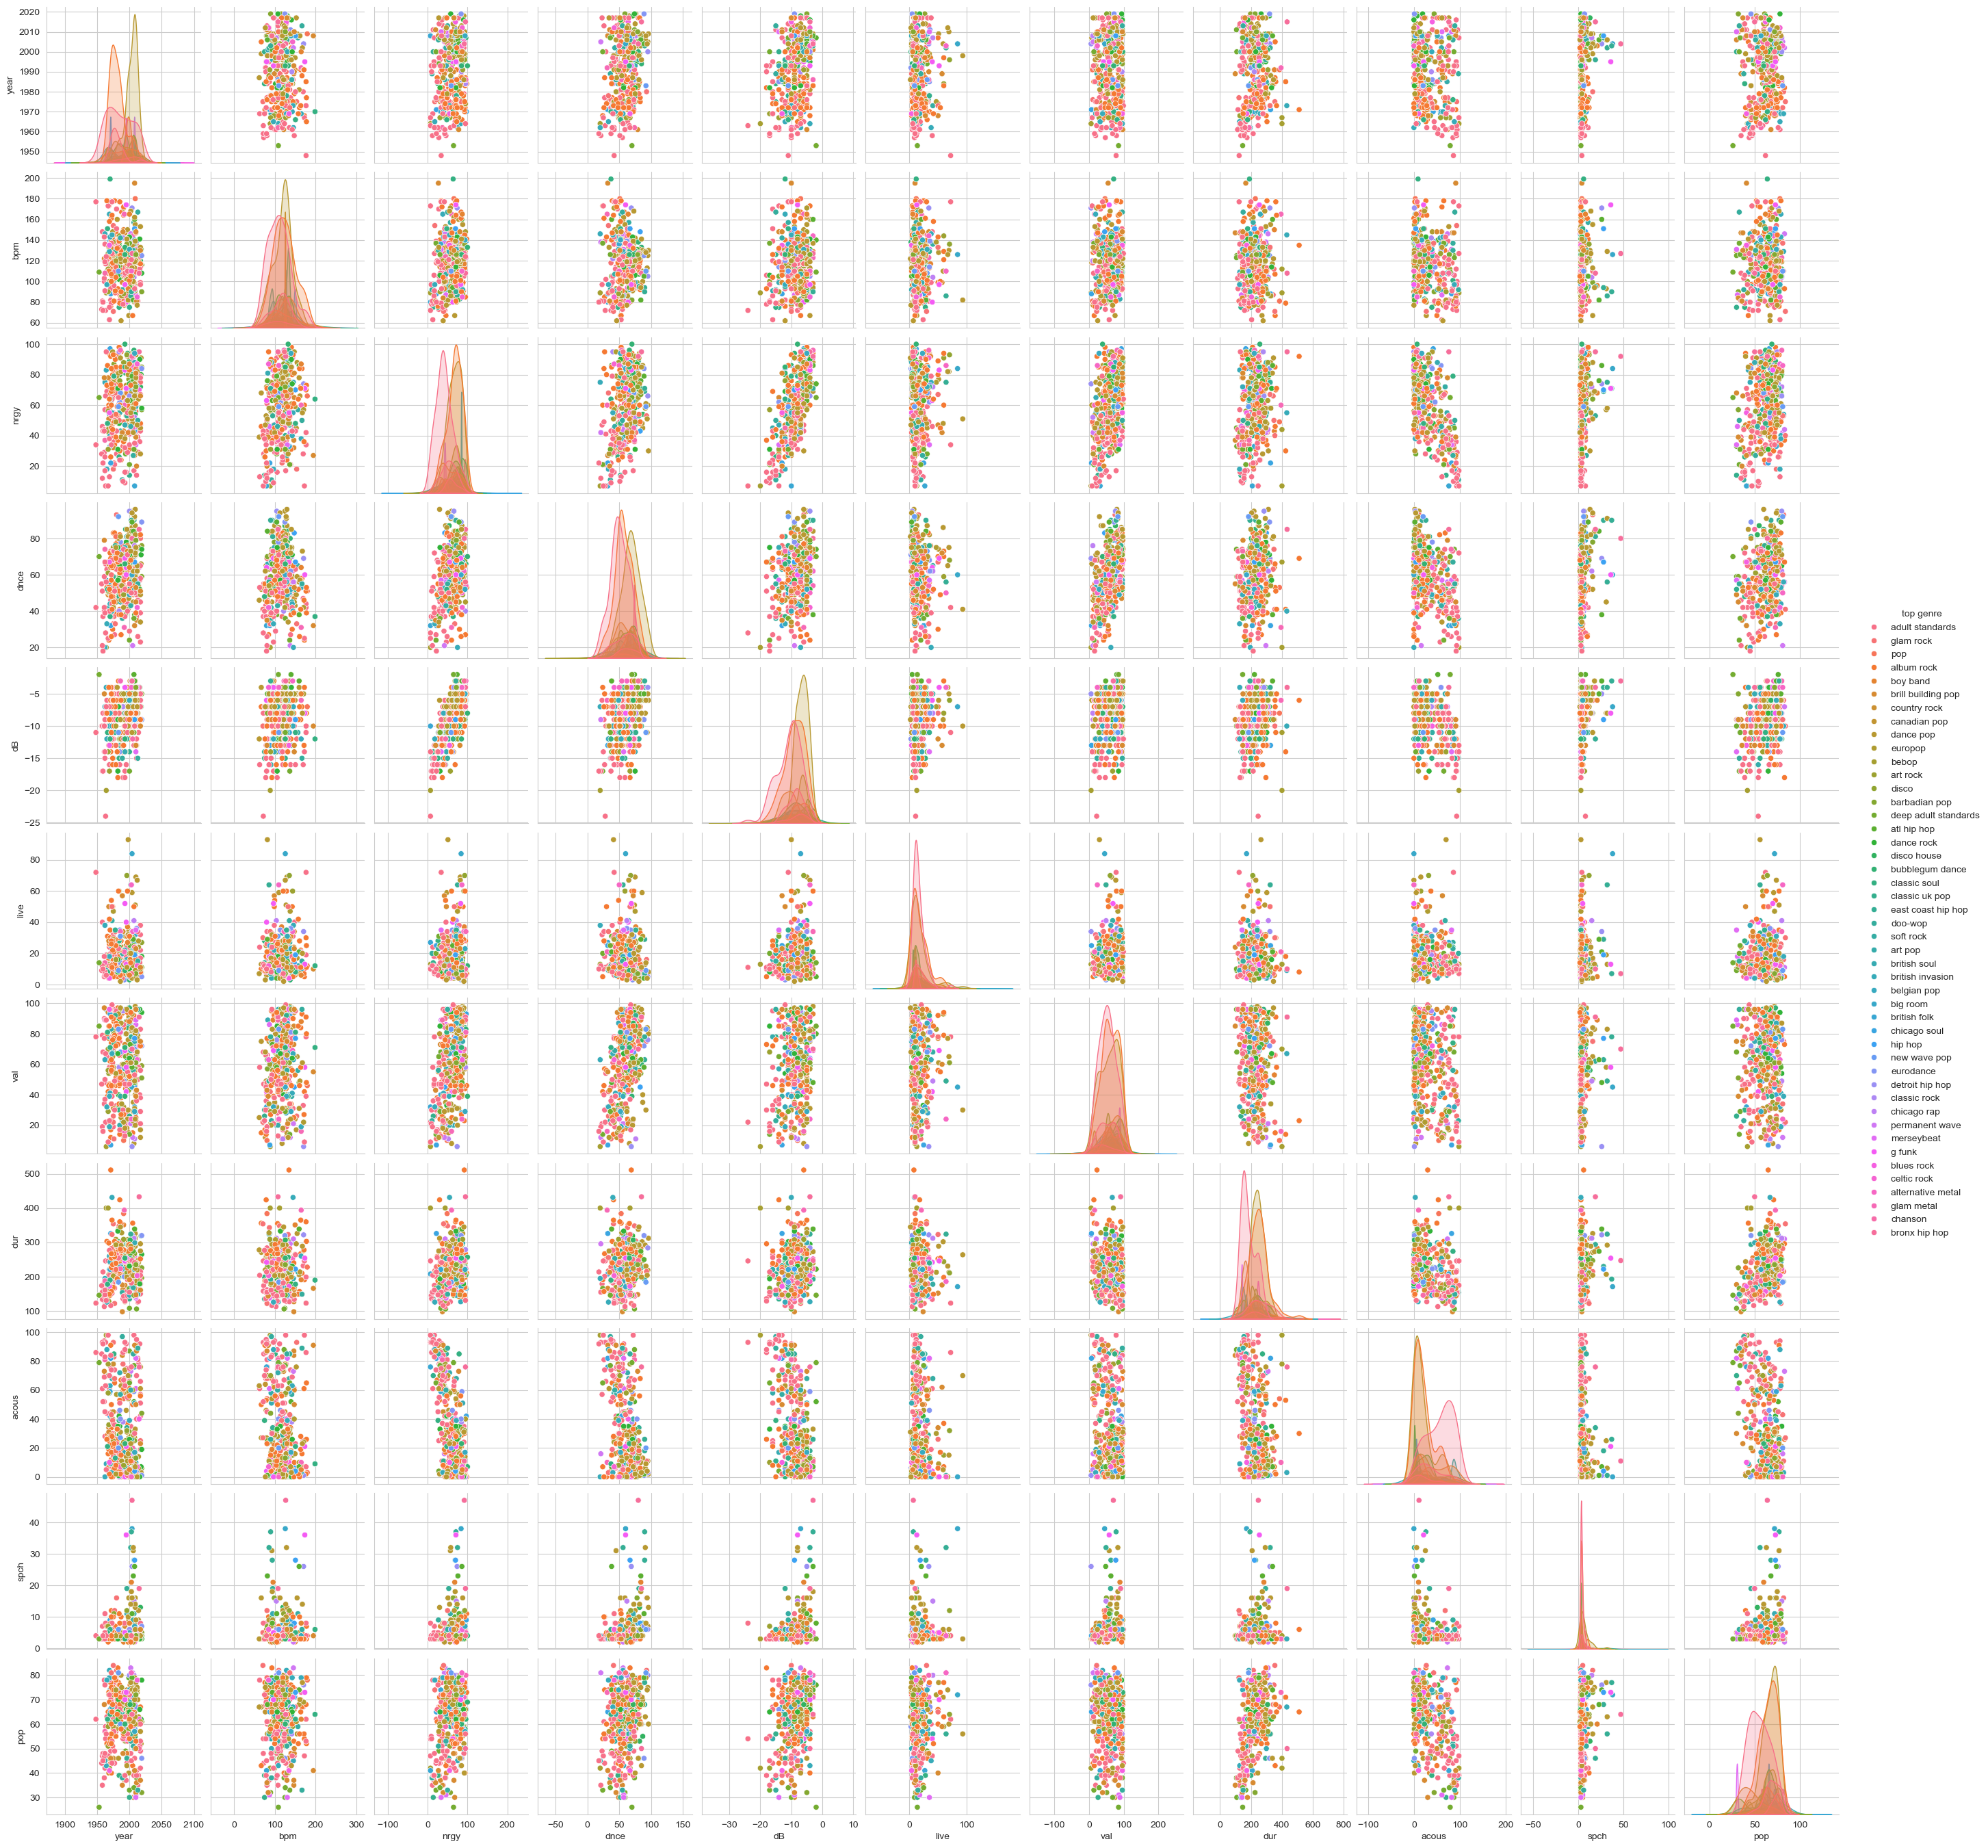

In [31]:
sns.pairplot(df_filtered[numeric_features + ['top genre']], hue='top genre')
plt.show()

**Genre frequency bar plot**

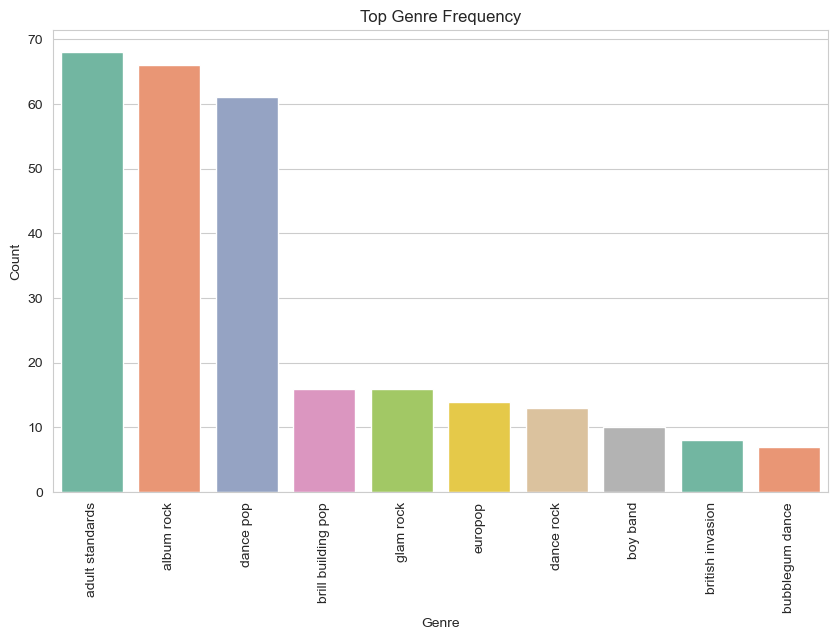

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='top genre', data=df_filtered, order=df_filtered['top genre'].value_counts().index[:10], palette='Set2')
plt.title('Top Genre Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

**Correlation heatmap**

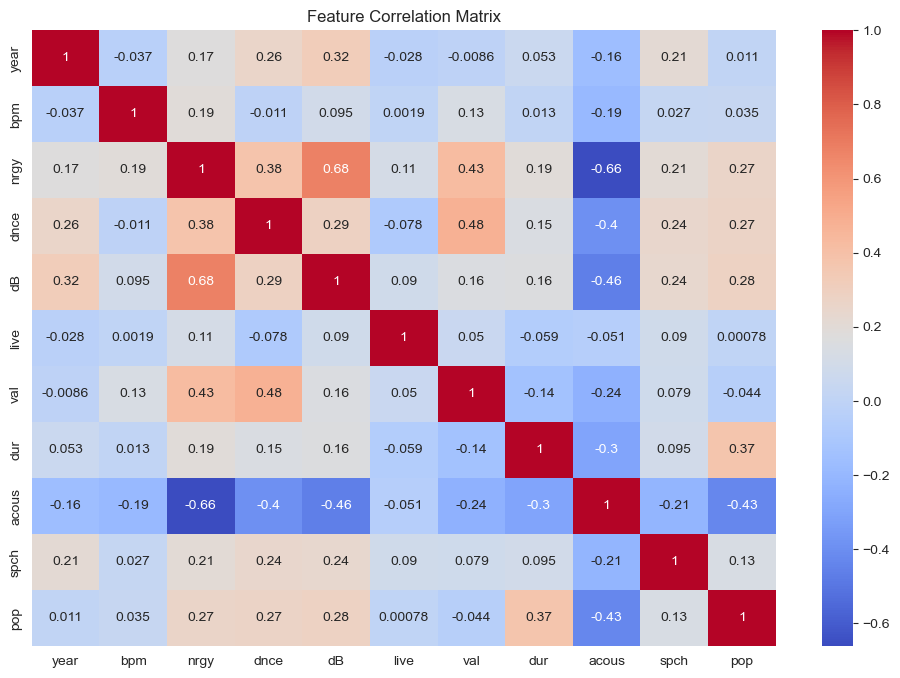

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df_filtered[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# LabelEncoder

In [37]:
# Define features and target
X = df_filtered.drop(['Id', 'title', 'top genre'], axis=1)
y = df_filtered['top genre']

In [38]:
# Encode target variable (genres to numeric)
le_genre = LabelEncoder()
y_encoded = le_genre.fit_transform(y)

In [39]:
# Step 2: Define numerical and categorical features
cat_features = ['artist']

# One Hot Encoder

In [41]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ])

In [42]:
# Transform features
X_processed = preprocessor.fit_transform(X)

# Train-test split

In [45]:
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)


# Model Selection 

**Train multiple models**

In [48]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    }

In [49]:
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

Decision Tree Accuracy: 0.3125
Random Forest Accuracy: 0.5375
SVM Accuracy: 0.5375
Logistic Regression Accuracy: 0.5625
Gradient Boosting Accuracy: 0.6250


**Identify the best-performing model**

In [51]:
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Best Validation Accuracy: {best_accuracy:.4f}")


Best Model: Gradient Boosting
Best Validation Accuracy: 0.6250


**Hyperparameter tuning for the best model**

In [53]:
if  best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
    }
    model = GradientBoostingClassifier(random_state=42)

elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    model = RandomForestClassifier(random_state=42)

elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    }
    model = SVC(random_state=42)

elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear'],
        'max_iter': [100, 200]
    }
    model = LogisticRegression(random_state=42)

else:  # Decision Tree
    param_grid = {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10]
    }
    model = DecisionTreeClassifier(random_state=42)

# Perform grid search

grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

# Evaluate tuned model on validation set
best_tuned_model = grid_search.best_estimator_
y_pred_tuned = best_tuned_model.predict(X_val)
tuned_accuracy = accuracy_score(y_val, y_pred_tuned)

print(f"Validation Accuracy after Hyperparameter Tuning: {tuned_accuracy:.4f}")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Cross-validation Accuracy: 0.5503
Validation Accuracy after Hyperparameter Tuning: 0.6250


# Model Comparison: Best Accuracy Scores

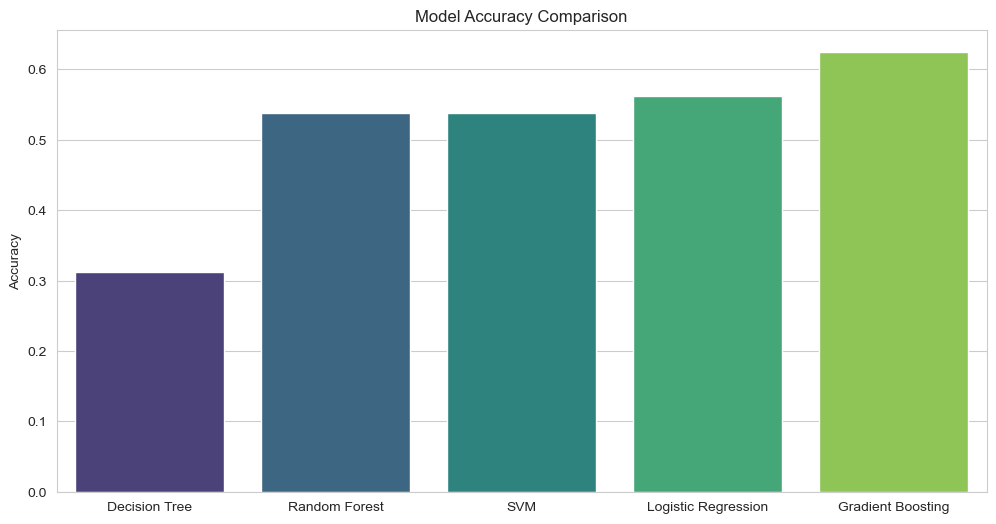

In [55]:
# Accuracy comparison plot with colors
plt.figure(figsize=(12,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=0)
plt.show()

# Conclusion

Based on the accuracy comparison plot, **Gradient Boosting** achieved the highest accuracy among the models tested, closely followed by **Logistic Regression** and **SVM**. The **Random Forest** model also demonstrated competitive performance, whereas the **Decision Tree** significantly underperformed in comparison.

This clearly indicates that ensemble methods, particularly **Gradient Boosting**, are most effective for this genre classification task, likely due to their ability to handle complex feature interactions and reduce overfitting. For further improvements in your Kaggle competition, it is recommended to apply hyperparameter tuning specifically to the **Gradient Boosting** model to optimize its performance.

**Prepare and process test data**

In [59]:
test_df = pd.read_csv('CS98XClassificationTest.csv')
test_ids = test_df['Id']
X_test = test_df.drop(['Id', 'title'], axis=1)
X_test_processed = preprocessor.transform(X_test)

**Predict genres on test dataset using the best model (Gradient Boosting)**

In [61]:
best_model = models['Gradient Boosting']
test_pred_encoded = best_model.predict(X_test_processed)
test_pred_genres = le_genre.inverse_transform(test_pred_encoded)

# Kaggle Submission Results

In [63]:
# Step 8: Create submission file
submission_df = pd.DataFrame({
    'Id': test_ids,
    'top genre': test_pred_genres
})
submission_df.to_csv('final_kaggle_submission.csv', index=False)
print(submission_df.head(10))

    Id           top genre
0  454           dance pop
1  455           glam rock
2  456           glam rock
3  457           dance pop
4  458     adult standards
5  459           dance pop
6  460          album rock
7  461  brill building pop
8  462           dance pop
9  463          album rock
